In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresión Logística


In [3]:
# Funcion logistica
def logistic(x):
    return 1/(1 + np.exp(-x))

# funcion de perdida
def log_loss(y,y_prime):
    first_part = -y*np.log(y_prime)
    second_part = (1-y)*np.log(1 - y_prime)
    return first_part - second_part

# Funcion de costos
def cost_func(y,y_prime):
    return np.mean(log_loss(y,y_prime))

# Funcion de costo generalizada
def cost_func_logreg(y,X,w,b):
    # Estima X*w + b
    if X.shape[1] == len(w):
        vect_input = X@w + b
    else:
        raise Exception('Shapes dont match')
    # aplicacion regression logistica
    y_prime = logistic(vect_input)
    # Estimacion del error:
    loss = cost_func(y,y_prime)

    return loss

# Gradiente descendente

# Derivada w
def delta_w(X,w,b,y):
    vect_input = X@w + b
    dj_dw = (logistic(vect_input)-y)@X
    mean_dj_dw = np.mean(dj_dw)

    return mean_dj_dw

# Derivada b
def delta_b(X,w,b,y):
    vect_input = X@w + b
    dj_db = (logistic(vect_input)-y)
    mean_dj_db = np.mean(dj_db)

    return mean_dj_db

# Estima el gradiente descendiente
def gradient_descent(X,w,b,y,a,n_iter):
    # Lista para almacenar la perdida
    loss_history = list()
    for i in range(n_iter):
        
        grad_w = delta_w(X,w,b,y)
        grad_b = delta_b(X,w,b,y)
        w -=  a*grad_w
        b -=  a*grad_b
        # Estimacion del error
        loss = cost_func_logreg(y,X,w,b)
        loss_history.append(loss)

        if i%1000 == 0:
            print(f'Iteration:{i}, error: {loss}')

    return w,b,loss_history

# Ejemplo
X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 10000
w_opt,b_opt,loss = gradient_descent(X,w,b,y,alpha,n_iter)


Iteration:0, error: 0.6925849969661286
Iteration:1000, error: 0.354620831315222
Iteration:2000, error: 0.222431349297449
Iteration:3000, error: 0.15805629527849302
Iteration:4000, error: 0.12126075183333235
Iteration:5000, error: 0.09782324117983202
Iteration:6000, error: 0.08172309512467203
Iteration:7000, error: 0.07003888483261138
Iteration:8000, error: 0.06120056588415856
Iteration:9000, error: 0.05429574086865601


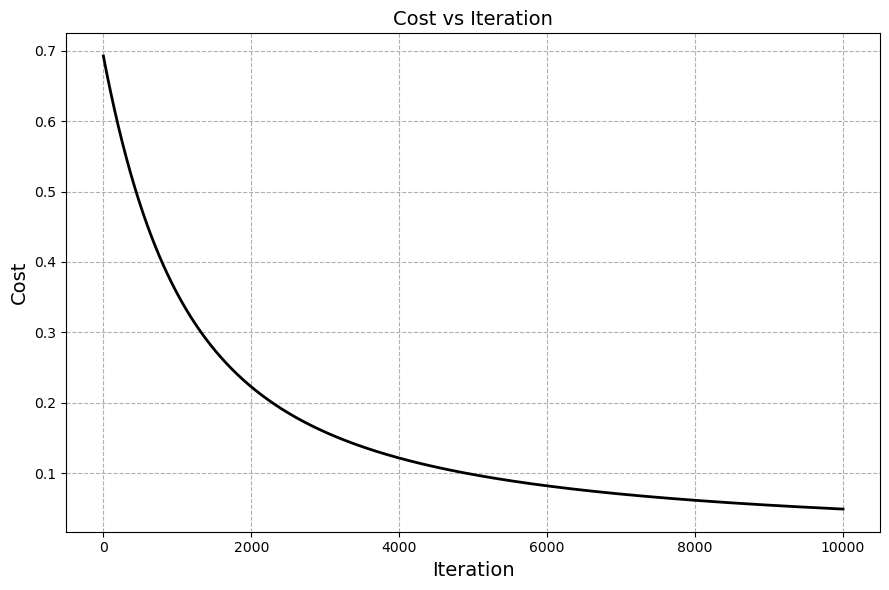

In [4]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(loss,color='k',linewidth=2)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.grid(linestyle='--')
plt.show()

## Aplicación de la regresión logística

In [55]:
# Loading the data
path = 'data/train.csv'
data = pd.read_csv(path)

## Exploracion de los datos
Se revisan la consistencia del dataframe al igual que posibles datos faltantes
- La Columna "Cabin" tienen 77% de datos faltantes, por lo cual es preferible eliminarla.
- La columna de "Name" es una columna tipo string, la cual no tiene un peso a la hora de entrenar el modelo
- Se remueve la columna "Ticket" dado que no da información relevante al modelo
- También se remueve embarked
- Se remueve "Fare" porque es redundante con la Columna "Pclass"
- Se remueve "PassengerID"

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
columns = [
    'PassengerId',
    'Name',
    'SibSp',
    'Parch',
    'Ticket',
    'Cabin',
    'Embarked'
]
data = data.drop(columns=columns)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


La columna `Sex` se extrae en dos columna con valores binarios para entrenar el modelo. Adicional se inputan los valores faltantes de edad como la media.

In [58]:
data = pd.get_dummies(
    data,
    columns=['Sex'],
    dtype=int
)

In [59]:
mean_age = np.mean(data['Age'])
data = data.fillna(mean_age)

Se extrae la columna survived en un vector propio, dado que el variable objertivo. Asimismo, se normalizan los daots para tener los valores entre 0 y 1 para evitar que una variable se retenga toda la varianza

In [60]:
y_target = data['Survived'].values
data = data.drop(columns=['Survived'])
# Normalizacion de Age y Fare
min_age = data['Age'].min()
max_age = data['Age'].max()
data['Age'] = (data['Age'] - min_age) / (max_age-min_age)
# Fare
min_fare = data['Fare'].min()
max_fare = data['Fare'].max()
data['Fare'] = (data['Fare'] - min_fare) / (max_fare - min_fare)
# Normalizacion Fare
min_pclass = data['Pclass'].min()
max_pclass = data['Pclass'].max()
data['Pclass'] = (data['Pclass'] - min_pclass) / (max_pclass - min_pclass)

Se corre el modelo iniciando con pesos aleatorios y al igual que un sesgo aleatorio

In [130]:
# PEsos aleatorios entre -20 y 20
X = data.values
w = np.random.uniform(
    low=0,
    high=10, 
    size=X.shape[1]
)
b = -0.5

In [131]:
# Atributos del dataframe
alpha = 0.001
n_iter = 100000

In [132]:
# Se ajusta el modelo
w_opt,b_opt,loss = gradient_descent(X,w,b,y_target,alpha,n_iter)

Iteration:0, error: 6.337622856699148
Iteration:1000, error: 0.9715696093560168
Iteration:2000, error: 0.9682209086172123
Iteration:3000, error: 0.9648875979907269
Iteration:4000, error: 0.9615697160696779
Iteration:5000, error: 0.9582673005794932
Iteration:6000, error: 0.9549803883619216
Iteration:7000, error: 0.9517090153591432
Iteration:8000, error: 0.9484532165979886
Iteration:9000, error: 0.9452130261742832
Iteration:10000, error: 0.9419884772373239
Iteration:11000, error: 0.9387796019745115
Iteration:12000, error: 0.9355864315961419
Iteration:13000, error: 0.9324089963203753
Iteration:14000, error: 0.9292473253583986
Iteration:15000, error: 0.9261014468997882
Iteration:16000, error: 0.9229713880980976
Iteration:17000, error: 0.919857175056674
Iteration:18000, error: 0.9167588328147266
Iteration:19000, error: 0.9136763853336561
Iteration:20000, error: 0.9106098554836617
Iteration:21000, error: 0.9075592650306413
Iteration:22000, error: 0.9045246346233974
Iteration:23000, error: 0.

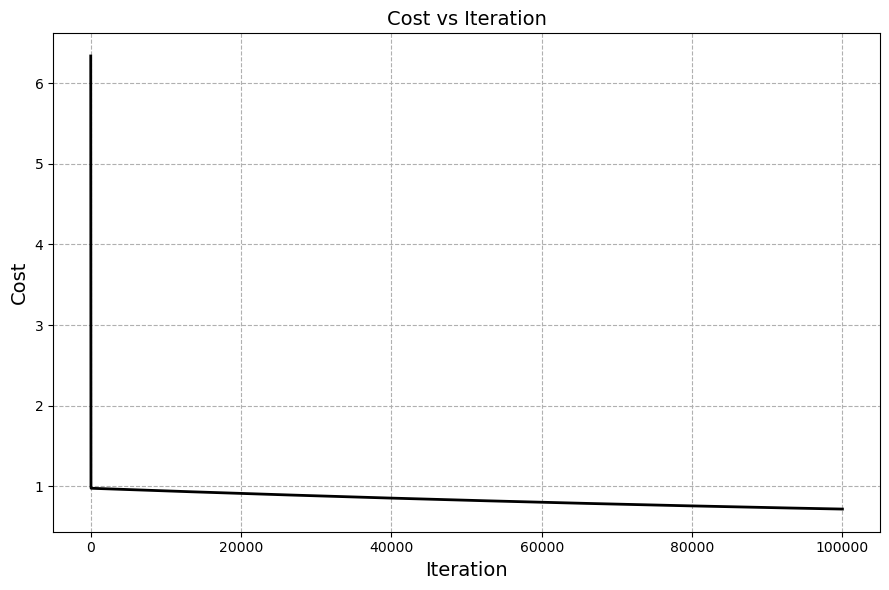

In [133]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(loss,color='k',linewidth=2)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.grid(linestyle='--')
plt.show()